# <u> Room Occupancy Estimation Data Set</u>
#### Data set for estimating the precise number of occupants in a room using multiple non-intrusive environmental sensors like temperature, light, sound, CO2 and PIR. 

## <u> Data Set Information</u>
#### The experimental testbed for occupancy estimation was deployed in a 6m - 4.6m room.
#### The setup consisted of 7 sensor nodes and one edge node in a star configuration with the sensor nodes transmitting data to the edge every 30s using wireless transceivers.
#### No HVAC (heating, ventilation and air conditioning) systems were in use while the dataset was being collected. 
#### Five different types of non-intrusive sensors were used in this experiment:Temperature, Light, Sound, CO2 and Digital Passive Infrared (PIR). - A passive infrared sensor (PIR sensor) is an electronic sensor that measures infrared (IR) light radiating from objects in its field of view.

#### Sensor nodes S1-S4 consisted of temperature, light and sound sensors, S5 had a CO2 sensor and S6 and S7 had one PIR sensor each that were deployed on the ceiling ledges at an angle that maximized the sensors field of view for motion detection.
#### The data was collected for a period of 7 days in a controlled manner with the occupancy in the room varying between 0 and 3 people. The ground truth of the occupancy count in the room was noted manually.
#### The CO2, sound and PIR sensors needed manual calibration. For the CO2 sensor, zero-point calibration was manually done before its first use by keeping it in a clean environment for over 20 minutes and then pulling the calibration pin (HD pin) low for over 7s. The sound sensor is essentially a microphone with a variable-gain analog amplifier attached to it. Therefore, the output of this sensor is analog which is read by the microcontrollers ADC in volts. The potentiometer tied to the gain of the amplifier was adjusted to ensure the highest sensitivity. The PIR sensor has two trimpots: one to tweak the sensitivity and the other to tweak the time for which the output stays high after detecting motion. Both of these were adjusted to the highest values. 

### <u>Attribute Information:</u>
#### Date: YYYY/MM/DD, Time: HH:MM:SS, Temperature: In degree Celsius, Light: In Lux, Sound: In Volts (amplifier output read by ADC), CO2: In Parts-per-million (PPM), CO2 Slope: Slope of CO2 values taken in a sliding window, PIR: Binary value conveying motion detection, Room_Occupancy_Count: Ground Truth

## Importing Packages ##

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading Dataset ##

In [ ]:
data = pd.read_csv('Occupancy_Estimation.csv')
data

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,12/24/17,1:06:48,25.38,25.38,24.88,25.75,0.0,0.0,0.0,0.0,0.06,0.05,0.06,0.06,365.0,-0.003846,no motion detected,no motion detected,empty room
1,12/25/17,10:28:47,25.06,25.13,24.75,NaN,10.0,11.0,48.0,33.0,0.08,NaN,0.06,0.11,NaN,0.000000,no motion detected,no motion detected,empty room
2,12/22/17,11:45:20,25.44,25.63,24.94,25.81,155.0,234.0,70.0,54.0,NaN,2.12,0.34,0.06,515.0,3.226923,motion detected,no motion detected,2 persons
3,1/10/18,15:53:22,25.69,26.44,25.56,25.75,9.0,8.0,50.0,30.0,0.69,2.43,0.40,0.36,425.0,1.707692,motion detected,motion detected,3 persons
4,12/26/17,0:36:22,25.31,25.38,24.94,25.81,0.0,0.0,0.0,0.0,0.08,0.05,0.05,0.09,NaN,0.000000,no motion detected,no motion detected,empty room
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,12/26/17,0:07:16,25.38,25.38,NaN,25.81,0.0,0.0,0.0,0.0,0.07,0.06,NaN,NaN,NaN,0.000000,no motion detected,no motion detected,empty room
1256,12/22/17,11:23:54,25.31,NaN,24.81,NaN,124.0,35.0,60.0,45.0,0.13,0.10,NaN,0.06,445.0,0.969231,no motion detected,no motion detected,1 person
1257,12/26/17,0:27:10,25.31,25.38,24.94,25.81,0.0,0.0,0.0,0.0,0.08,0.05,0.06,0.09,NaN,0.000000,no motion detected,no motion detected,empty room
1258,1/10/18,16:44:56,25.81,26.06,25.75,25.88,4.0,4.0,27.0,14.0,0.08,0.05,NaN,0.09,695.0,2.707692,motion detected,motion detected,3 persons


Dataset has 1260 rows × 19 columns

### Extracting Data Columns

In [ ]:
data.columns

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')

The dataset has the following columns: Date, Time, S1_Temp, S2_Temp, S3_Temp, S4_Temp, S1_Light, S2_Light, S3_Light, S4_Light, S1_Sound, S2_Sound, S3_Sound, S4_Sound, S5_CO2, S5_CO2_Slope, S6_PIR, S7_PIR, Room_Occupancy_Count

### Getting Data Head and Tail

In [ ]:
data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,12/24/17,1:06:48,25.38,25.38,24.88,25.75,0.0,0.0,0.0,0.0,0.06,0.05,0.06,0.06,365.0,-0.003846,no motion detected,no motion detected,empty room
1,12/25/17,10:28:47,25.06,25.13,24.75,NaN,10.0,11.0,48.0,33.0,0.08,NaN,0.06,0.11,NaN,0.000000,no motion detected,no motion detected,empty room
2,12/22/17,11:45:20,25.44,25.63,24.94,25.81,155.0,234.0,70.0,54.0,NaN,2.12,0.34,0.06,515.0,3.226923,motion detected,no motion detected,2 persons
3,1/10/18,15:53:22,25.69,26.44,25.56,25.75,9.0,8.0,50.0,30.0,0.69,2.43,0.40,0.36,425.0,1.707692,motion detected,motion detected,3 persons
4,12/26/17,0:36:22,25.31,25.38,24.94,25.81,0.0,0.0,0.0,0.0,0.08,0.05,0.05,0.09,NaN,0.000000,no motion detected,no motion detected,empty room


In [ ]:
data.tail()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
1255,12/26/17,0:07:16,25.38,25.38,NaN,25.81,0.0,0.0,0.0,0.0,0.07,0.06,NaN,NaN,NaN,0.000000,no motion detected,no motion detected,empty room
1256,12/22/17,11:23:54,25.31,NaN,24.81,NaN,124.0,35.0,60.0,45.0,0.13,0.10,NaN,0.06,445.0,0.969231,no motion detected,no motion detected,1 person
1257,12/26/17,0:27:10,25.31,25.38,24.94,25.81,0.0,0.0,0.0,0.0,0.08,0.05,0.06,0.09,NaN,0.000000,no motion detected,no motion detected,empty room
1258,1/10/18,16:44:56,25.81,26.06,25.75,25.88,4.0,4.0,27.0,14.0,0.08,0.05,NaN,0.09,695.0,2.707692,motion detected,motion detected,3 persons
1259,12/26/17,1:21:18,25.38,25.38,24.94,25.81,0.0,0.0,0.0,0.0,0.07,0.05,0.06,0.09,NaN,0.000000,no motion detected,no motion detected,empty room


### Checking Data Info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1260 non-null   object 
 1   Time                  1260 non-null   object 
 2   S1_Temp               1217 non-null   float64
 3   S2_Temp               1227 non-null   float64
 4   S3_Temp               1177 non-null   float64
 5   S4_Temp               1080 non-null   float64
 6   S1_Light              1218 non-null   float64
 7   S2_Light              1228 non-null   float64
 8   S3_Light              1246 non-null   float64
 9   S4_Light              1227 non-null   float64
 10  S1_Sound              1242 non-null   float64
 11  S2_Sound              1037 non-null   float64
 12  S3_Sound              1074 non-null   float64
 13  S4_Sound              997 non-null    float64
 14  S5_CO2                896 non-null    float64
 15  S5_CO2_Slope         

### Checking the null values for each column in dataset with use of isna() method

In [ ]:
data.isna().sum()

Date                      0
Time                      0
S1_Temp                  43
S2_Temp                  33
S3_Temp                  83
S4_Temp                 180
S1_Light                 42
S2_Light                 32
S3_Light                 14
S4_Light                 33
S1_Sound                 18
S2_Sound                223
S3_Sound                186
S4_Sound                263
S5_CO2                  364
S5_CO2_Slope              0
S6_PIR                    0
S7_PIR                    0
Room_Occupancy_Count      0
dtype: int64

### Missing values Total count

In [ ]:
# total number of missing values in dataframe
data.isna().sum().sum()   # 1514

1514

Total number of missing values in dataframe is 1514

In [ ]:
# total data frame size
data.size   #23940

23940

Total data frame size 23940

In [ ]:
# Number of rows and columns in data frame
data.shape   #(1260, 19)

(1260, 19)

Number of rows and columns in data frame is 1260, 19

In [ ]:
# percentage of missing values
data.isna().sum().sum()/data.size * 100   #6.32% (Approx.)

6.3241436925647445

### Sum of Missing Values by Column with use of isnull() method

In [ ]:
data.isnull().sum()

Date                      0
Time                      0
S1_Temp                  43
S2_Temp                  33
S3_Temp                  83
S4_Temp                 180
S1_Light                 42
S2_Light                 32
S3_Light                 14
S4_Light                 33
S1_Sound                 18
S2_Sound                223
S3_Sound                186
S4_Sound                263
S5_CO2                  364
S5_CO2_Slope              0
S6_PIR                    0
S7_PIR                    0
Room_Occupancy_Count      0
dtype: int64

### Imputation of Missing Values using Mode

In [ ]:
#making a copy of the orginal dataframe
data_orginal=data
cols = ['S1_Temp', 'S2_Temp', 'S3_Temp','S4_Temp','S1_Light','S2_Light','S3_Light','S4_Light','S1_Sound','S2_Sound','S3_Sound','S4_Sound','S5_CO2']

for column in cols:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [ ]:
data.isna().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [ ]:
data.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

### Finding Unique values for the Categorical Data

In [ ]:
# Finding unique values for the column - Room_Occupancy_Count
data['Room_Occupancy_Count'].unique()

array(['empty room', '2 persons', '3 persons', '1 person'], dtype=object)

In [ ]:
# Finding unique values for the column - S6_PIR
data['S6_PIR'].unique()

array(['no motion detected', 'motion detected'], dtype=object)

In [ ]:
# Finding unique values for the column - S7_PIR
data['S7_PIR'].unique()

array(['no motion detected', 'motion detected'], dtype=object)

### Conversion of Time to seconds

In [ ]:
def time_convert(x):
    h,m,s = map(int,x.split(':'))
    return (h*60+m)*60+s

data.Time.apply(time_convert)

0        4008
1       37727
2       42320
3       57202
4        2182
        ...  
1255      436
1256    41034
1257     1630
1258    60296
1259     4878
Name: Time, Length: 1260, dtype: int64

## Visualizing Temperature Feature

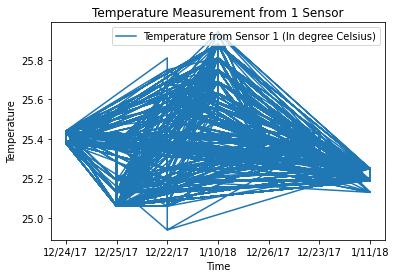

In [ ]:
time = data.Time
S1_Temp = data.S1_Temp
S2_Temp = data.S2_Temp
S3_Temp = data.S3_Temp
S4_Temp = data.S4_Temp

# plot the first line
plt.plot(data.Date, S1_Temp, label = "Temperature from Sensor 1 (In degree Celsius)")

# name the x axis
plt.xlabel('Time')

# name the y axis
plt.ylabel('Temperature')

# give a title to the graph
plt.title('Temperature Measurement from 1 Sensor')

# give legend
plt.legend(loc='upper right')

# function to show the plot
plt.show()

### Sensor 2 vs Temperature Measurement

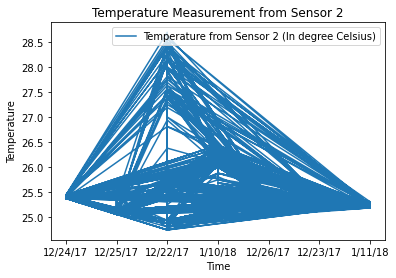

In [ ]:
# plot the second line
plt.plot(data.Date, S2_Temp, label = "Temperature from Sensor 2 (In degree Celsius)")

# name the x axis
plt.xlabel('Time')

# name the y axis
plt.ylabel('Temperature')

# give a title to the graph
plt.title('Temperature Measurement from Sensor 2')

# give legend
plt.legend(loc='upper right')

# function to show the plot
plt.show()


### Sensor 3 vs Temperature Measurement

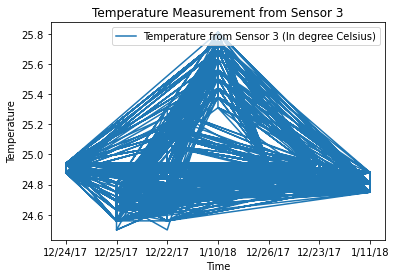

In [ ]:
# plot the third line
plt.plot(data.Date, S3_Temp, label = "Temperature from Sensor 3 (In degree Celsius)")

# name the x axis
plt.xlabel('Time')

# name the y axis
plt.ylabel('Temperature')

# give a title to the graph
plt.title('Temperature Measurement from Sensor 3')

# give legend
plt.legend(loc='upper right')

# function to show the plot
plt.show()

### Sensor 4 vs Temperature Measurement

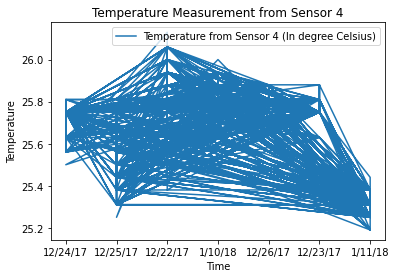

In [ ]:
# plot the Fourth line
plt.plot(data.Date, S4_Temp, label = "Temperature from Sensor 4 (In degree Celsius)")

# name the x axis
plt.xlabel('Time')

# name the y axis
plt.ylabel('Temperature')

# give a title to the graph
plt.title('Temperature Measurement from Sensor 4')

# give legend
plt.legend(loc='upper right')

# function to show the plot
plt.show()

### Finding mean of S Columns

In [ ]:
# Finding mean of columns - "S1_Temp","S2_Temp", "S3_Temp", "S4_Temp"
df1 = data[["S1_Temp","S2_Temp", "S3_Temp", "S4_Temp"]].mean()
print(df1)

S1_Temp    25.379706
S2_Temp    25.537667
S3_Temp    24.964944
S4_Temp    25.683968
dtype: float64


### MEAN VS Temperature 

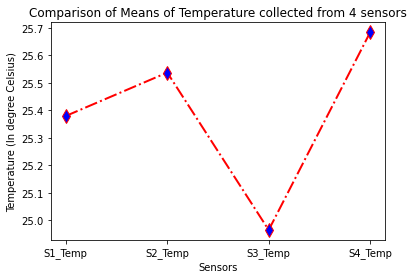

In [ ]:
temp_col = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp']
plt.plot(temp_col,df1, color='red', linestyle='-.', linewidth=2, marker='d',markerfacecolor='blue', markersize=10)
plt.title("Comparison of Means of Temperature collected from 4 sensors")
plt.xlabel("Sensors")
plt.ylabel("Temperature (In degree Celsius)")
plt.show()

In [ ]:
# Finding mean of columns - "S1_Temp","S2_Temp", "S3_Temp", "S4_Temp"
df1_mean = df1.mean()
print(df1_mean)

25.391571428571524


In [ ]:
data['Temp_avg'] = data[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp']].mean(axis=1)


In [ ]:
data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Temp_avg
0,12/24/17,1:06:48,25.38,25.38,24.88,25.75,0.0,0.0,0.0,0.0,0.06,0.05,0.06,0.06,365.0,-0.003846,no motion detected,no motion detected,empty room,25.3475
1,12/25/17,10:28:47,25.06,25.13,24.75,25.75,10.0,11.0,48.0,33.0,0.08,0.05,0.06,0.11,370.0,0.000000,no motion detected,no motion detected,empty room,25.1725
2,12/22/17,11:45:20,25.44,25.63,24.94,25.81,155.0,234.0,70.0,54.0,0.07,2.12,0.34,0.06,515.0,3.226923,motion detected,no motion detected,2 persons,25.4550
3,1/10/18,15:53:22,25.69,26.44,25.56,25.75,9.0,8.0,50.0,30.0,0.69,2.43,0.40,0.36,425.0,1.707692,motion detected,motion detected,3 persons,25.8600
4,12/26/17,0:36:22,25.31,25.38,24.94,25.81,0.0,0.0,0.0,0.0,0.08,0.05,0.05,0.09,370.0,0.000000,no motion detected,no motion detected,empty room,25.3600


### Temperature vs Date

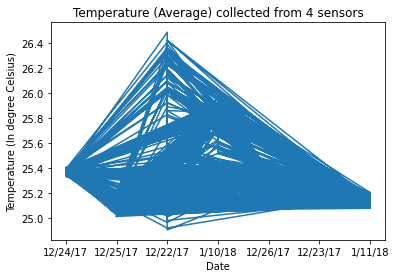

In [ ]:
plt.plot(data.Date,data.Temp_avg)
plt.title("Temperature (Average) collected from 4 sensors")
plt.xlabel("Date")
plt.ylabel("Temperature (In degree Celsius)")
plt.show()

### Scatter plot Date vs Temperature

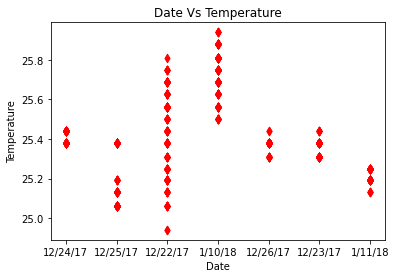

In [ ]:
plt.scatter(data.Date, data.S1_Temp,color= 'red', marker= "d")
# x-axis label
plt.xlabel('Date')
# frequency label
plt.ylabel('Temperature')
# plot title
plt.title('Date Vs Temperature')
# function to show the plot
plt.show()

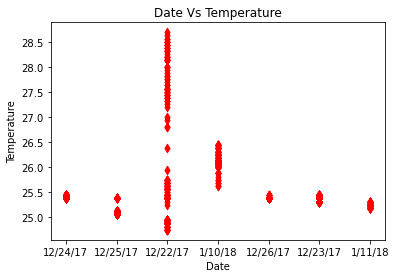

In [ ]:
plt.scatter(data.Date, data.S2_Temp,color= 'red', marker= "d")
# x-axis label
plt.xlabel('Date')
# frequency label
plt.ylabel('Temperature')
# plot title
plt.title('Date Vs Temperature')
# function to show the plot
plt.show()

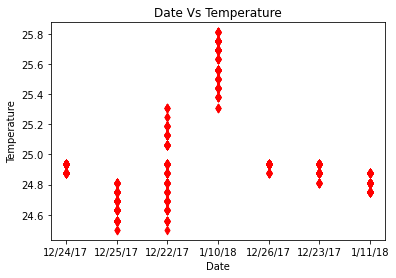

In [ ]:
plt.scatter(data.Date, data.S3_Temp,color= 'red', marker= "d")
# x-axis label
plt.xlabel('Date')
# frequency label
plt.ylabel('Temperature')
# plot title
plt.title('Date Vs Temperature')
# function to show the plot
plt.show()

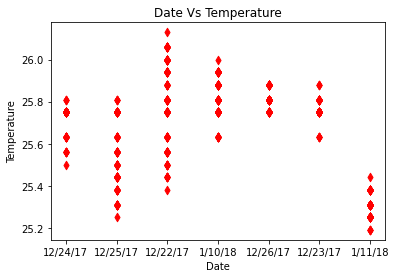

In [ ]:
plt.scatter(data.Date, data.S4_Temp,color= 'red', marker= "d")
# x-axis label
plt.xlabel('Date')
# frequency label
plt.ylabel('Temperature')
# plot title
plt.title('Date Vs Temperature')
# function to show the plot
plt.show()

In [ ]:
data['Room_Occupancy_Count_num'] = data['Room_Occupancy_Count'].map({
    "empty room": 0,
    "1 person": 1,
    "2 persons": 2,
    "3 persons": 3,
})

### Bar Chart Room Occupancy vs Temperature

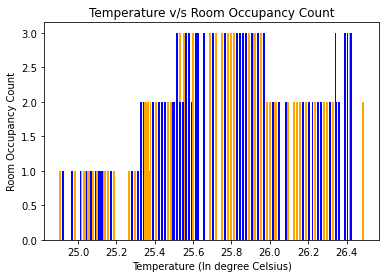

In [ ]:
# plotting a bar chart
#plt.bar(years, height, width =0.8, color = ['cornflowerblue', 'yellow'])
plt.bar(data.Temp_avg,data.Room_Occupancy_Count_num, width =0.01, color = ['blue', 'orange'])
# Naming the x-axis
plt.ylabel('Room Occupancy Count')
# Naming the y-axis
plt.xlabel('Temperature (In degree Celsius)')
# plot title
plt.title('Temperature v/s Room Occupancy Count')
# function to show the plot
plt.show()

## Visualizing Light

In [ ]:
# Finding mean of columns - "S1_Light","S2_Light", "S3_Light", "S4_Light"
df2 = data[["S1_Light","S2_Light", "S3_Light", "S4_Light"]].mean()
print(df2)

S1_Light    20.386508
S2_Light    22.275397
S3_Light    23.178571
S4_Light    14.262698
dtype: float64


### Sensors vs Light

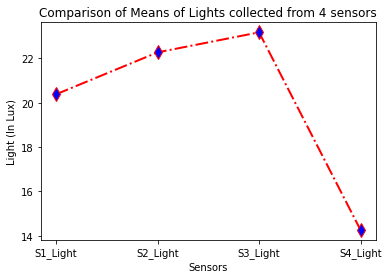

In [ ]:
light_col = ['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light']
plt.plot(light_col,df2, color='red', linestyle='-.', linewidth=2, marker='d',markerfacecolor='blue', markersize=10)
plt.title("Comparison of Means of Lights collected from 4 sensors")
plt.xlabel("Sensors")
plt.ylabel("Light (In Lux)")
plt.show()

In [ ]:
# Finding mean of columns - 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light'
df2_mean = df2.mean()
print(df2_mean)

20.025793650793652


In [ ]:
data['Light_avg'] = data[['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light']].mean(axis=1)

### Light vs Date

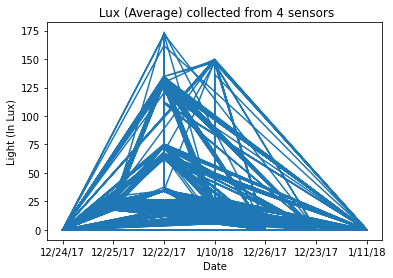

In [ ]:
plt.plot(data.Date,data.Light_avg)
plt.title(" Lux (Average) collected from 4 sensors")
plt.xlabel("Date")
plt.ylabel("Light (In Lux)")
plt.show()

### Room Occupancy vs Light

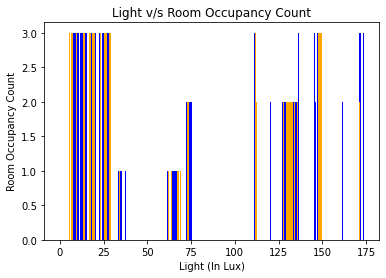

In [ ]:
# plotting a bar chart
#plt.bar(years, height, width =0.8, color = ['cornflowerblue', 'yellow'])
plt.bar(data.Light_avg,data.Room_Occupancy_Count_num, width =0.5, color = ['blue', 'orange'])
# Naming the x-axis
plt.ylabel('Room Occupancy Count')
# Naming the y-axis
plt.xlabel('Light (In Lux)')
# plot title
plt.title('Light v/s Room Occupancy Count')
# function to show the plot
plt.show()

## Visualizing Sound

In [ ]:
# Finding mean of columns - "S1_Sound","S2_Sound", "S3_Sound", "S4_Sound"
df3 = data[["S1_Sound","S2_Sound", "S3_Sound", "S4_Sound"]].mean()
print(df3)

S1_Sound    0.190635
S2_Sound    0.141921
S3_Sound    0.105683
S4_Sound    0.085579
dtype: float64


### Sound vs Sensors

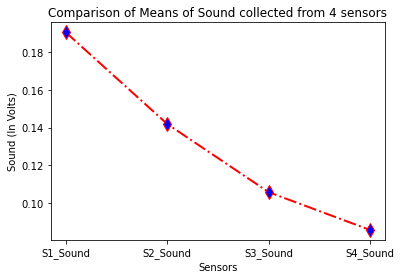

In [ ]:
sound_col = ["S1_Sound","S2_Sound", "S3_Sound", "S4_Sound"]
plt.plot(sound_col,df3, color='red', linestyle='-.', linewidth=2, marker='d',markerfacecolor='blue', markersize=10)
plt.title("Comparison of Means of Sound collected from 4 sensors")
plt.xlabel("Sensors")
plt.ylabel("Sound (In Volts)")
plt.show()

In [ ]:
# Finding mean of columns - "S1_Sound","S2_Sound", "S3_Sound", "S4_Sound"
df3_mean = df3.mean()
print(df3_mean)

0.1309543650793658


In [ ]:
data['Sound_avg'] = data[['S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound']].mean(axis=1)

### Date vs Sound

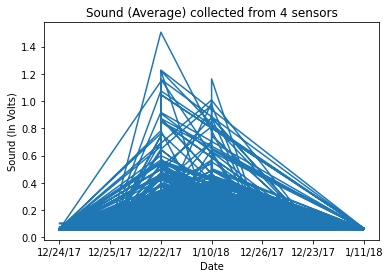

In [ ]:
plt.plot(data.Date,data.Sound_avg)
plt.title("Sound (Average) collected from 4 sensors")
plt.xlabel("Date")
plt.ylabel("Sound (In Volts)")
plt.show()

### Sound vs Room Occupancy Count

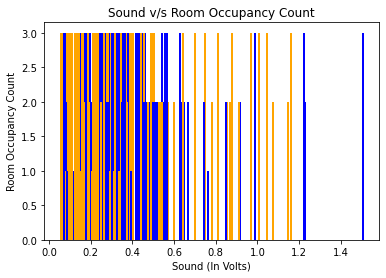

In [ ]:
# plotting a bar chart
#plt.bar(years, height, width =0.8, color = ['cornflowerblue', 'yellow'])
plt.bar(data.Sound_avg,data.Room_Occupancy_Count_num, width =0.01, color = ['blue', 'orange'])
# Naming the x-axis
plt.ylabel('Room Occupancy Count')
# Naming the y-axis
plt.xlabel('Sound (In Volts)')
# plot title
plt.title('Sound v/s Room Occupancy Count')
# function to show the plot
plt.show()

## Visualizing CO2 (In PPM)

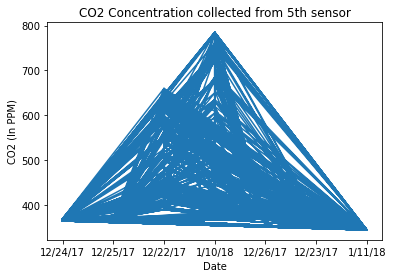

In [ ]:
plt.plot(data.Date,data.S5_CO2)
plt.title("CO2 Concentration collected from 5th sensor")
plt.xlabel("Date")
plt.ylabel("CO2 (In PPM)")
plt.show()

### Bar Chart CO2 vs Room Occupancy Count

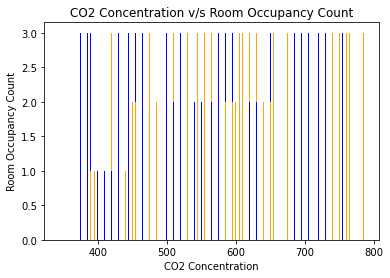

In [ ]:
# plotting a bar chart
#plt.bar(years, height, width =0.8, color = ['cornflowerblue', 'yellow'])
plt.bar(data.S5_CO2,data.Room_Occupancy_Count_num, width =0.9, color = ['blue', 'orange'])
# Naming the x-axis
plt.ylabel('Room Occupancy Count')
# Naming the y-axis
plt.xlabel('CO2 Concentration')
# plot title
plt.title('CO2 Concentration v/s Room Occupancy Count')
# function to show the plot
plt.show()

## Visualizing CO2 (Slope of CO2 values taken in a sliding window)

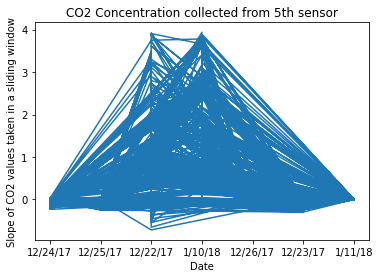

In [ ]:
plt.plot(data.Date,data.S5_CO2_Slope)
plt.title("CO2 Concentration collected from 5th sensor")
plt.xlabel("Date")
plt.ylabel("Slope of CO2 values taken in a sliding window")
plt.show()

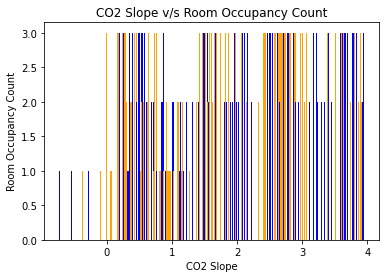

In [ ]:
# plotting a bar chart
#plt.bar(years, height, width =0.8, color = ['cornflowerblue', 'yellow'])
plt.bar(data.S5_CO2_Slope,data.Room_Occupancy_Count_num, width =0.01, color = ['blue', 'orange'])
# Naming the x-axis
plt.ylabel('Room Occupancy Count')
# Naming the y-axis
plt.xlabel('CO2 Slope')
# plot title
plt.title('CO2 Slope v/s Room Occupancy Count')
# function to show the plot
plt.show()

In [ ]:
S6_PIR_val=data['S6_PIR'].value_counts().reindex(['no motion detected', 'motion detected'], fill_value=0)
S6_PIR_val

no motion detected    1065
motion detected        195
Name: S6_PIR, dtype: int64

### PIE Chart 

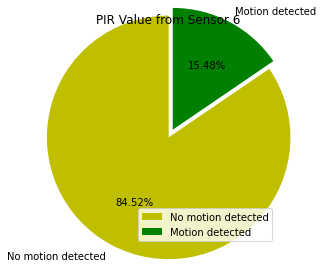

In [ ]:
# defining labels
activities = ['No motion detected', 'Motion detected']
# color for each label
colors = ['y', 'g']
# plotting the pie chart
plt.pie(S6_PIR_val, labels = activities, colors=colors, explode = (0, 0.1),startangle=90,radius = 1.4, autopct = '%2.2f%%')
# plotting legend
plt.legend(loc='lower right')
plt.title('PIR Value from Sensor 6')
# showing the plot
plt.show()

In [ ]:
data['S6_PIR_num'] = data['S6_PIR'].map({
    "no motion detected": 0,
    "motion detected": 1
})

data['S7_PIR_num'] = data['S7_PIR'].map({
    "no motion detected": 0,
    "motion detected": 1
})

### Bar Chart PIR vs Room Occupancy Count

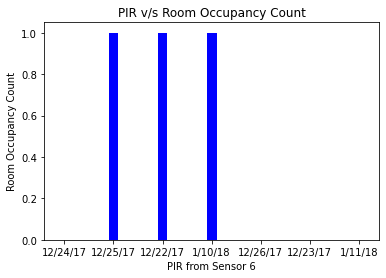

In [ ]:
# plotting a bar chart
#plt.bar(years, height, width =0.8, color = ['cornflowerblue', 'yellow'])
plt.bar(data.Date, data.S6_PIR_num, width =0.2, color = ['blue', 'orange'])
# Naming the x-axis
plt.ylabel('Room Occupancy Count')
# Naming the y-axis
plt.xlabel('PIR from Sensor 6')
# plot title
plt.title('PIR v/s Room Occupancy Count')
# function to show the plot
plt.show()

In [ ]:
S7_PIR_val=data['S7_PIR'].value_counts().reindex(['no motion detected', 'motion detected'], fill_value=0)
S7_PIR_val

no motion detected    1092
motion detected        168
Name: S7_PIR, dtype: int64

### PIE Chart

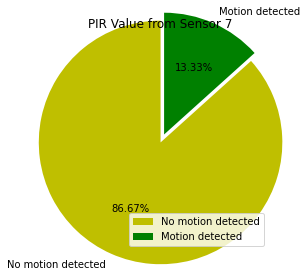

In [ ]:
# defining labels
activities = ['No motion detected', 'Motion detected']
# color for each label
colors = ['y', 'g']
# plotting the pie chart
plt.pie(S7_PIR_val, labels = activities, colors=colors, explode = (0, 0.1),startangle=90,radius = 1.4, autopct = '%2.2f%%')
# plotting legend
plt.legend(loc='lower right')
plt.title('PIR Value from Sensor 7')
# showing the plot
plt.show()

### Bar Chart Room Count vs PIR

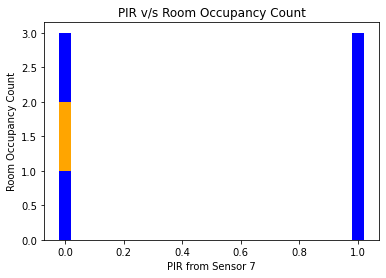

In [ ]:
# plotting a bar chart
#plt.bar(years, height, width =0.8, color = ['cornflowerblue', 'yellow'])
plt.bar(data.S7_PIR_num,data.Room_Occupancy_Count_num, width =0.04, color = ['blue', 'orange'])
# Naming the x-axis
plt.ylabel('Room Occupancy Count')
# Naming the y-axis
plt.xlabel('PIR from Sensor 7')
# plot title
plt.title('PIR v/s Room Occupancy Count')
# function to show the plot
plt.show()

In [ ]:
Room_Occupancy_Count_val=data['Room_Occupancy_Count'].value_counts().reindex(['1 person', '2 persons', '3 persons', 'empty room'], fill_value=0)
Room_Occupancy_Count_val

1 person       70
2 persons     107
3 persons     179
empty room    904
Name: Room_Occupancy_Count, dtype: int64

### PIE Chart

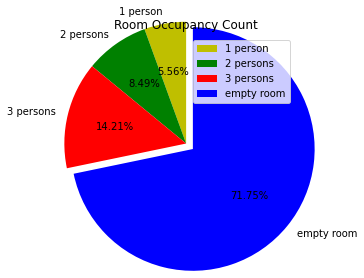

In [ ]:
# defining labels
activities = ['1 person', '2 persons', '3 persons', 'empty room']
# color for each label
colors = ['y', 'g','r','b']
# plotting the pie chart
plt.pie(Room_Occupancy_Count_val, labels = activities, colors=colors, explode = (0,0 , 0,0.1),startangle=90,radius = 1.4, autopct = '%2.2f%%')
# plotting legend
plt.legend(loc='upper right')
plt.title('Room Occupancy Count')
# showing the plot
plt.show()

71.75 percent of the time there wer no occupants in the room. While 28.25 percent of the time there were occupants present in the room.

# Conclusion 

From visualization on Temperature sensor while some days were hotter and some were colder, we can say that temperatures, 25.4-26.4 had more number of room occupants in a given time.
We could also say that 25.8 was a comfortable temperature for people to stay as maximum occupants were present in the room at that temperature.

The visualizations with the light signify that there were days with more power usage or possible daylight days because more light caught by sensors on few days than the rest. And we can conclude that there were more people during the late evenings for sleeping or resting.

Visualizations with the sound attribute suggest that there were more people when it was silence or rather no noise. This again leads us towards the conclusion that most of the time, room occupants spent sleeping in the room.

High CO2 levels, High temperatures during certain same days in the dataset makes the story stronger that there were more occupants in the room than the rest. 


The visualizations on the montion sensor data signifies that there were occupants in the room when there was maximum motion in the room. Also there were more people in the room at the time of sleeping, which is evident from bar chart PIR vs room occupant count

Major part of the time there were no occupants in the room. Which is significant from both the pie charts.
finally we can say that a warm temperature, low light and a considerable CO2 levels suggest there will be occupants present in the room.

# Investigation for better imputation method
## Imputation with mean

In [ ]:
cols = ['S1_Temp', 'S2_Temp', 'S3_Temp','S4_Temp','S1_Light','S2_Light','S3_Light','S4_Light','S1_Sound','S2_Sound','S3_Sound','S4_Sound','S5_CO2']
data_mean_imputed = data_orginal
for column in cols:
    data_mean_imputed[column].fillna(data_orginal[column].mean(), inplace=True)

In [ ]:
data_mean_imputed.isna().sum()

Date                        0
Time                        0
S1_Temp                     0
S2_Temp                     0
S3_Temp                     0
S4_Temp                     0
S1_Light                    0
S2_Light                    0
S3_Light                    0
S4_Light                    0
S1_Sound                    0
S2_Sound                    0
S3_Sound                    0
S4_Sound                    0
S5_CO2                      0
S5_CO2_Slope                0
S6_PIR                      0
S7_PIR                      0
Room_Occupancy_Count        0
Temp_avg                    0
Room_Occupancy_Count_num    0
Light_avg                   0
Sound_avg                   0
S6_PIR_num                  0
S7_PIR_num                  0
dtype: int64

In [ ]:
data_mean_imputed.isnull().sum()

Date                        0
Time                        0
S1_Temp                     0
S2_Temp                     0
S3_Temp                     0
S4_Temp                     0
S1_Light                    0
S2_Light                    0
S3_Light                    0
S4_Light                    0
S1_Sound                    0
S2_Sound                    0
S3_Sound                    0
S4_Sound                    0
S5_CO2                      0
S5_CO2_Slope                0
S6_PIR                      0
S7_PIR                      0
Room_Occupancy_Count        0
Temp_avg                    0
Room_Occupancy_Count_num    0
Light_avg                   0
Sound_avg                   0
S6_PIR_num                  0
S7_PIR_num                  0
dtype: int64

### Histogram plots from all the sensors for mode imputed values

/var/folders/rr/_sy_2qf11fzcvtkflq_vpdl00000gn/T/ipykernel_1644/3427136908.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  hist = data.hist(ax=ax, layout=(3,7), bins=19, alpha=0.5)


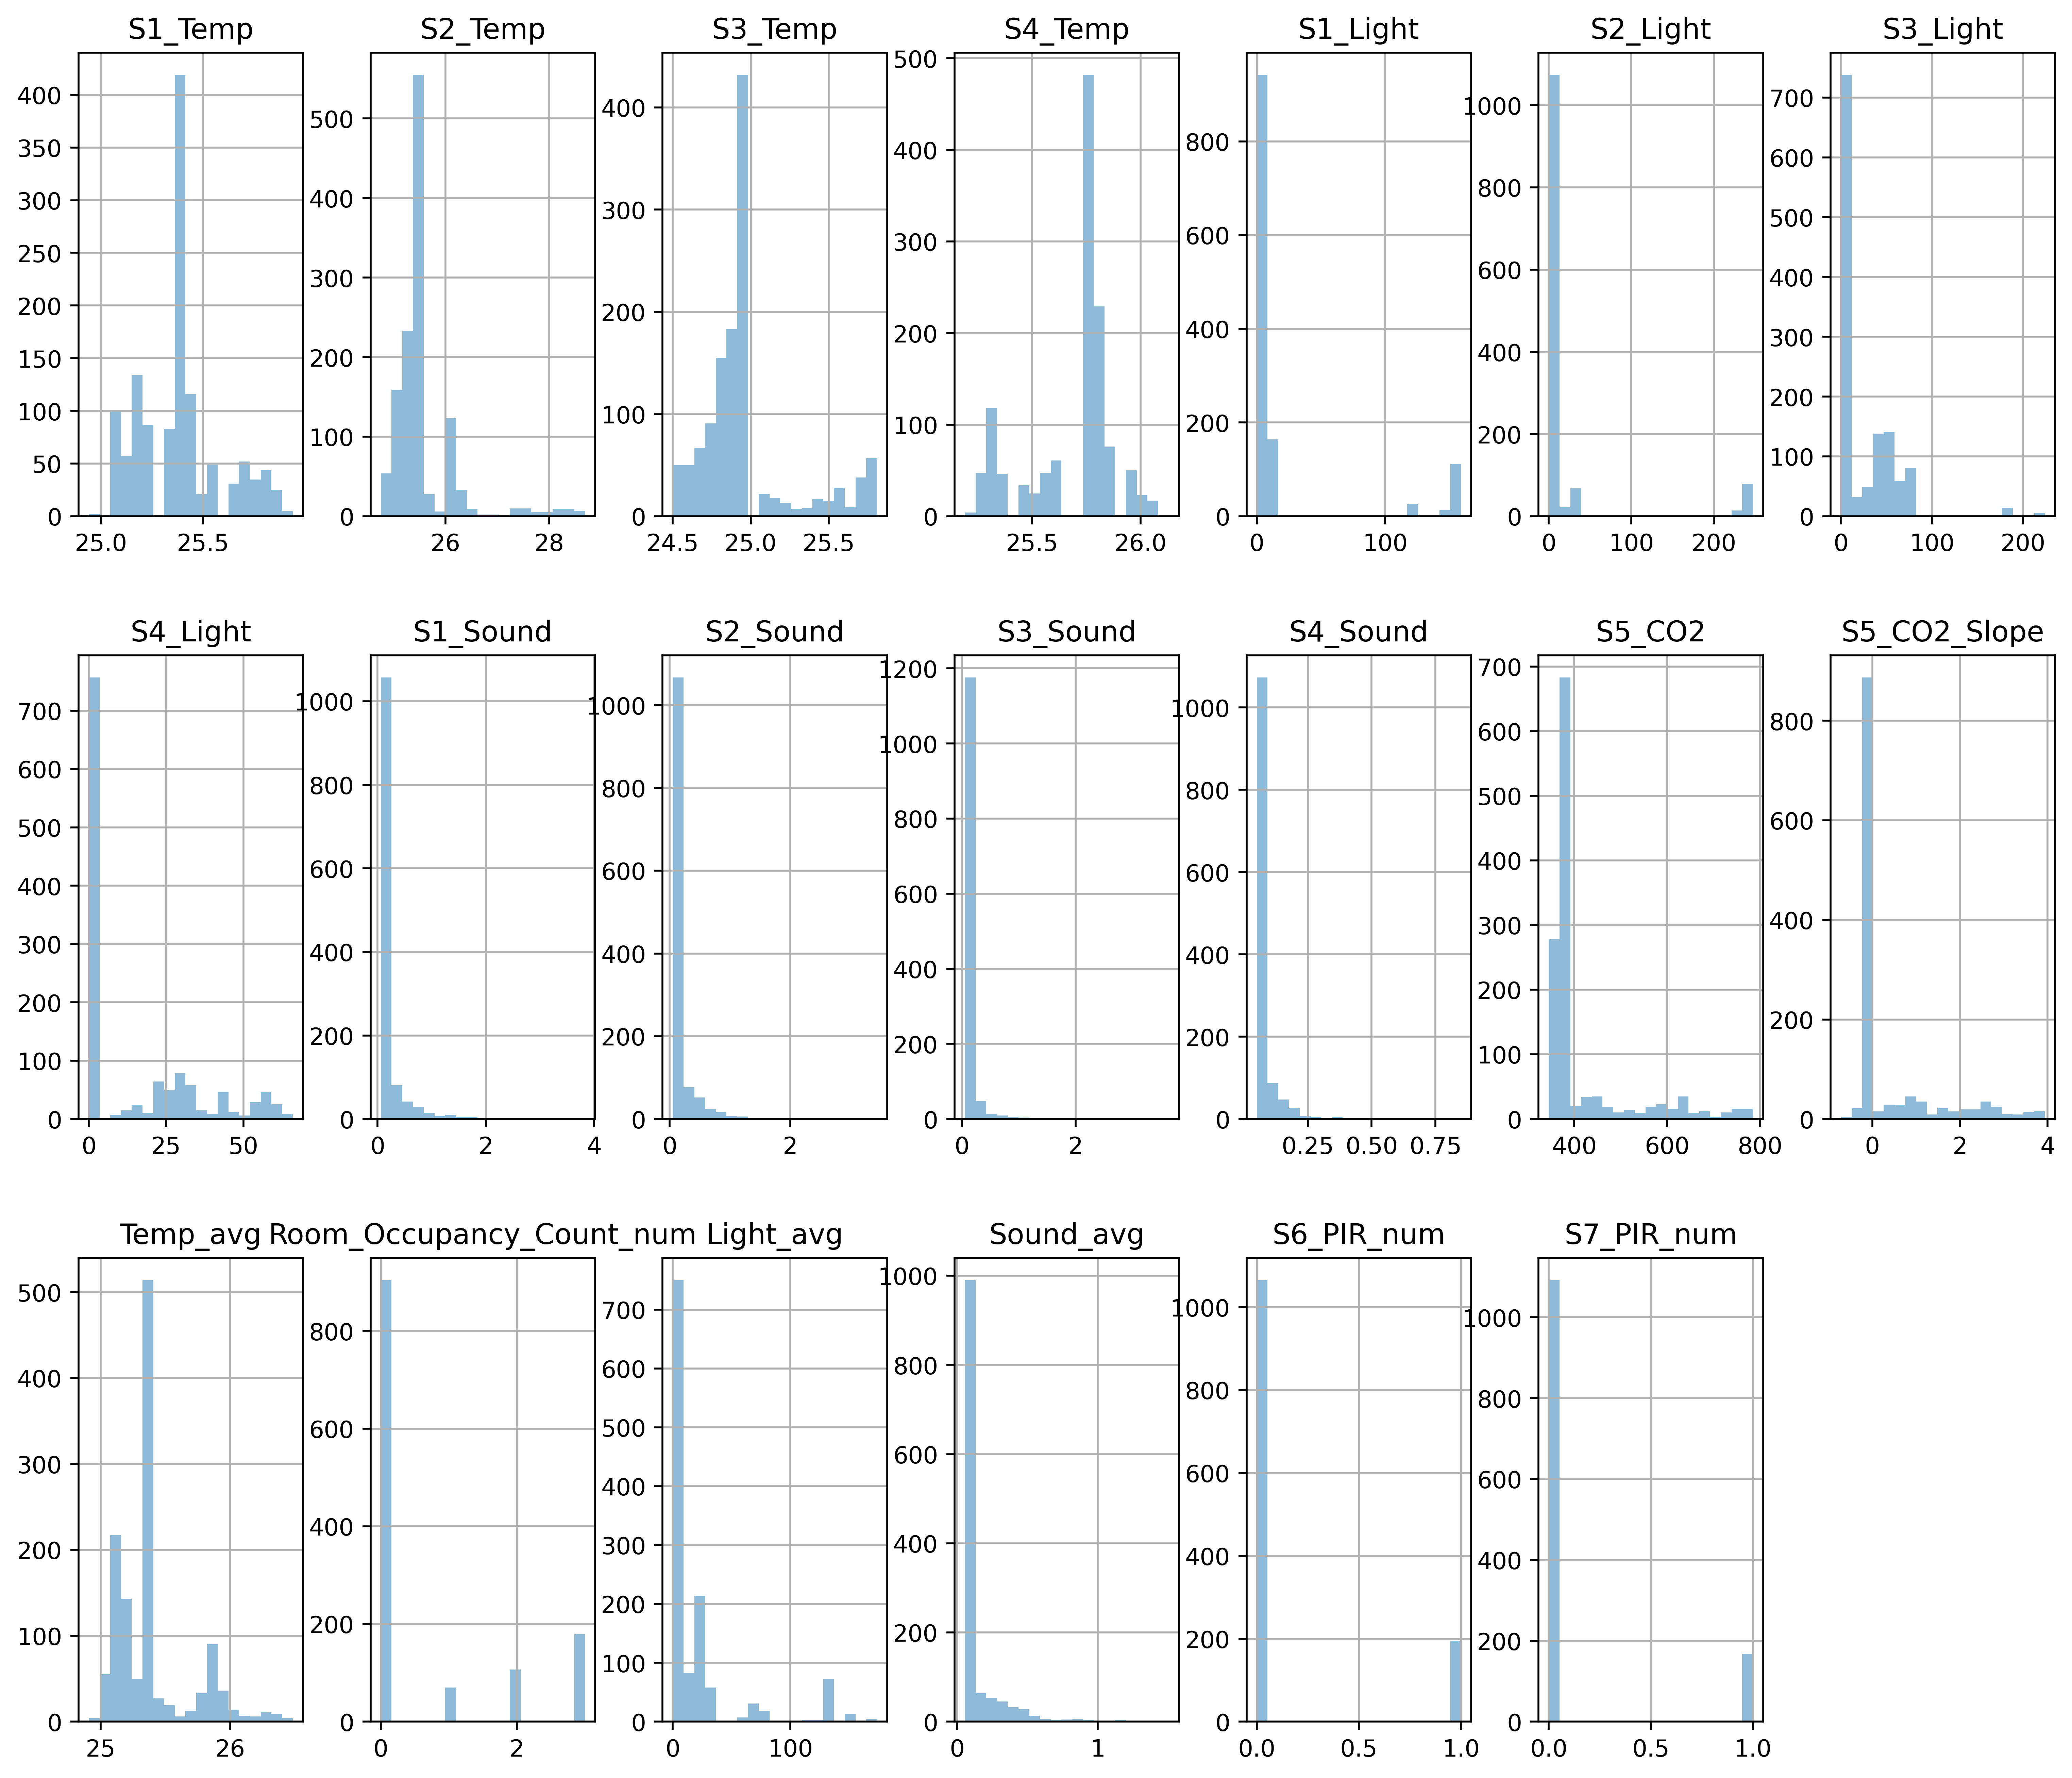

In [ ]:
fig, ax = plt.subplots(figsize=(15,13), dpi=500)
hist = data.hist(ax=ax, layout=(3,7), bins=19, alpha=0.5)

### Histogram plots from all the sensors for mean imputed values

/var/folders/rr/_sy_2qf11fzcvtkflq_vpdl00000gn/T/ipykernel_1644/2471179535.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  hist = data_mean_imputed.hist(ax=ax, layout=(3,7), bins=19, alpha=0.5)


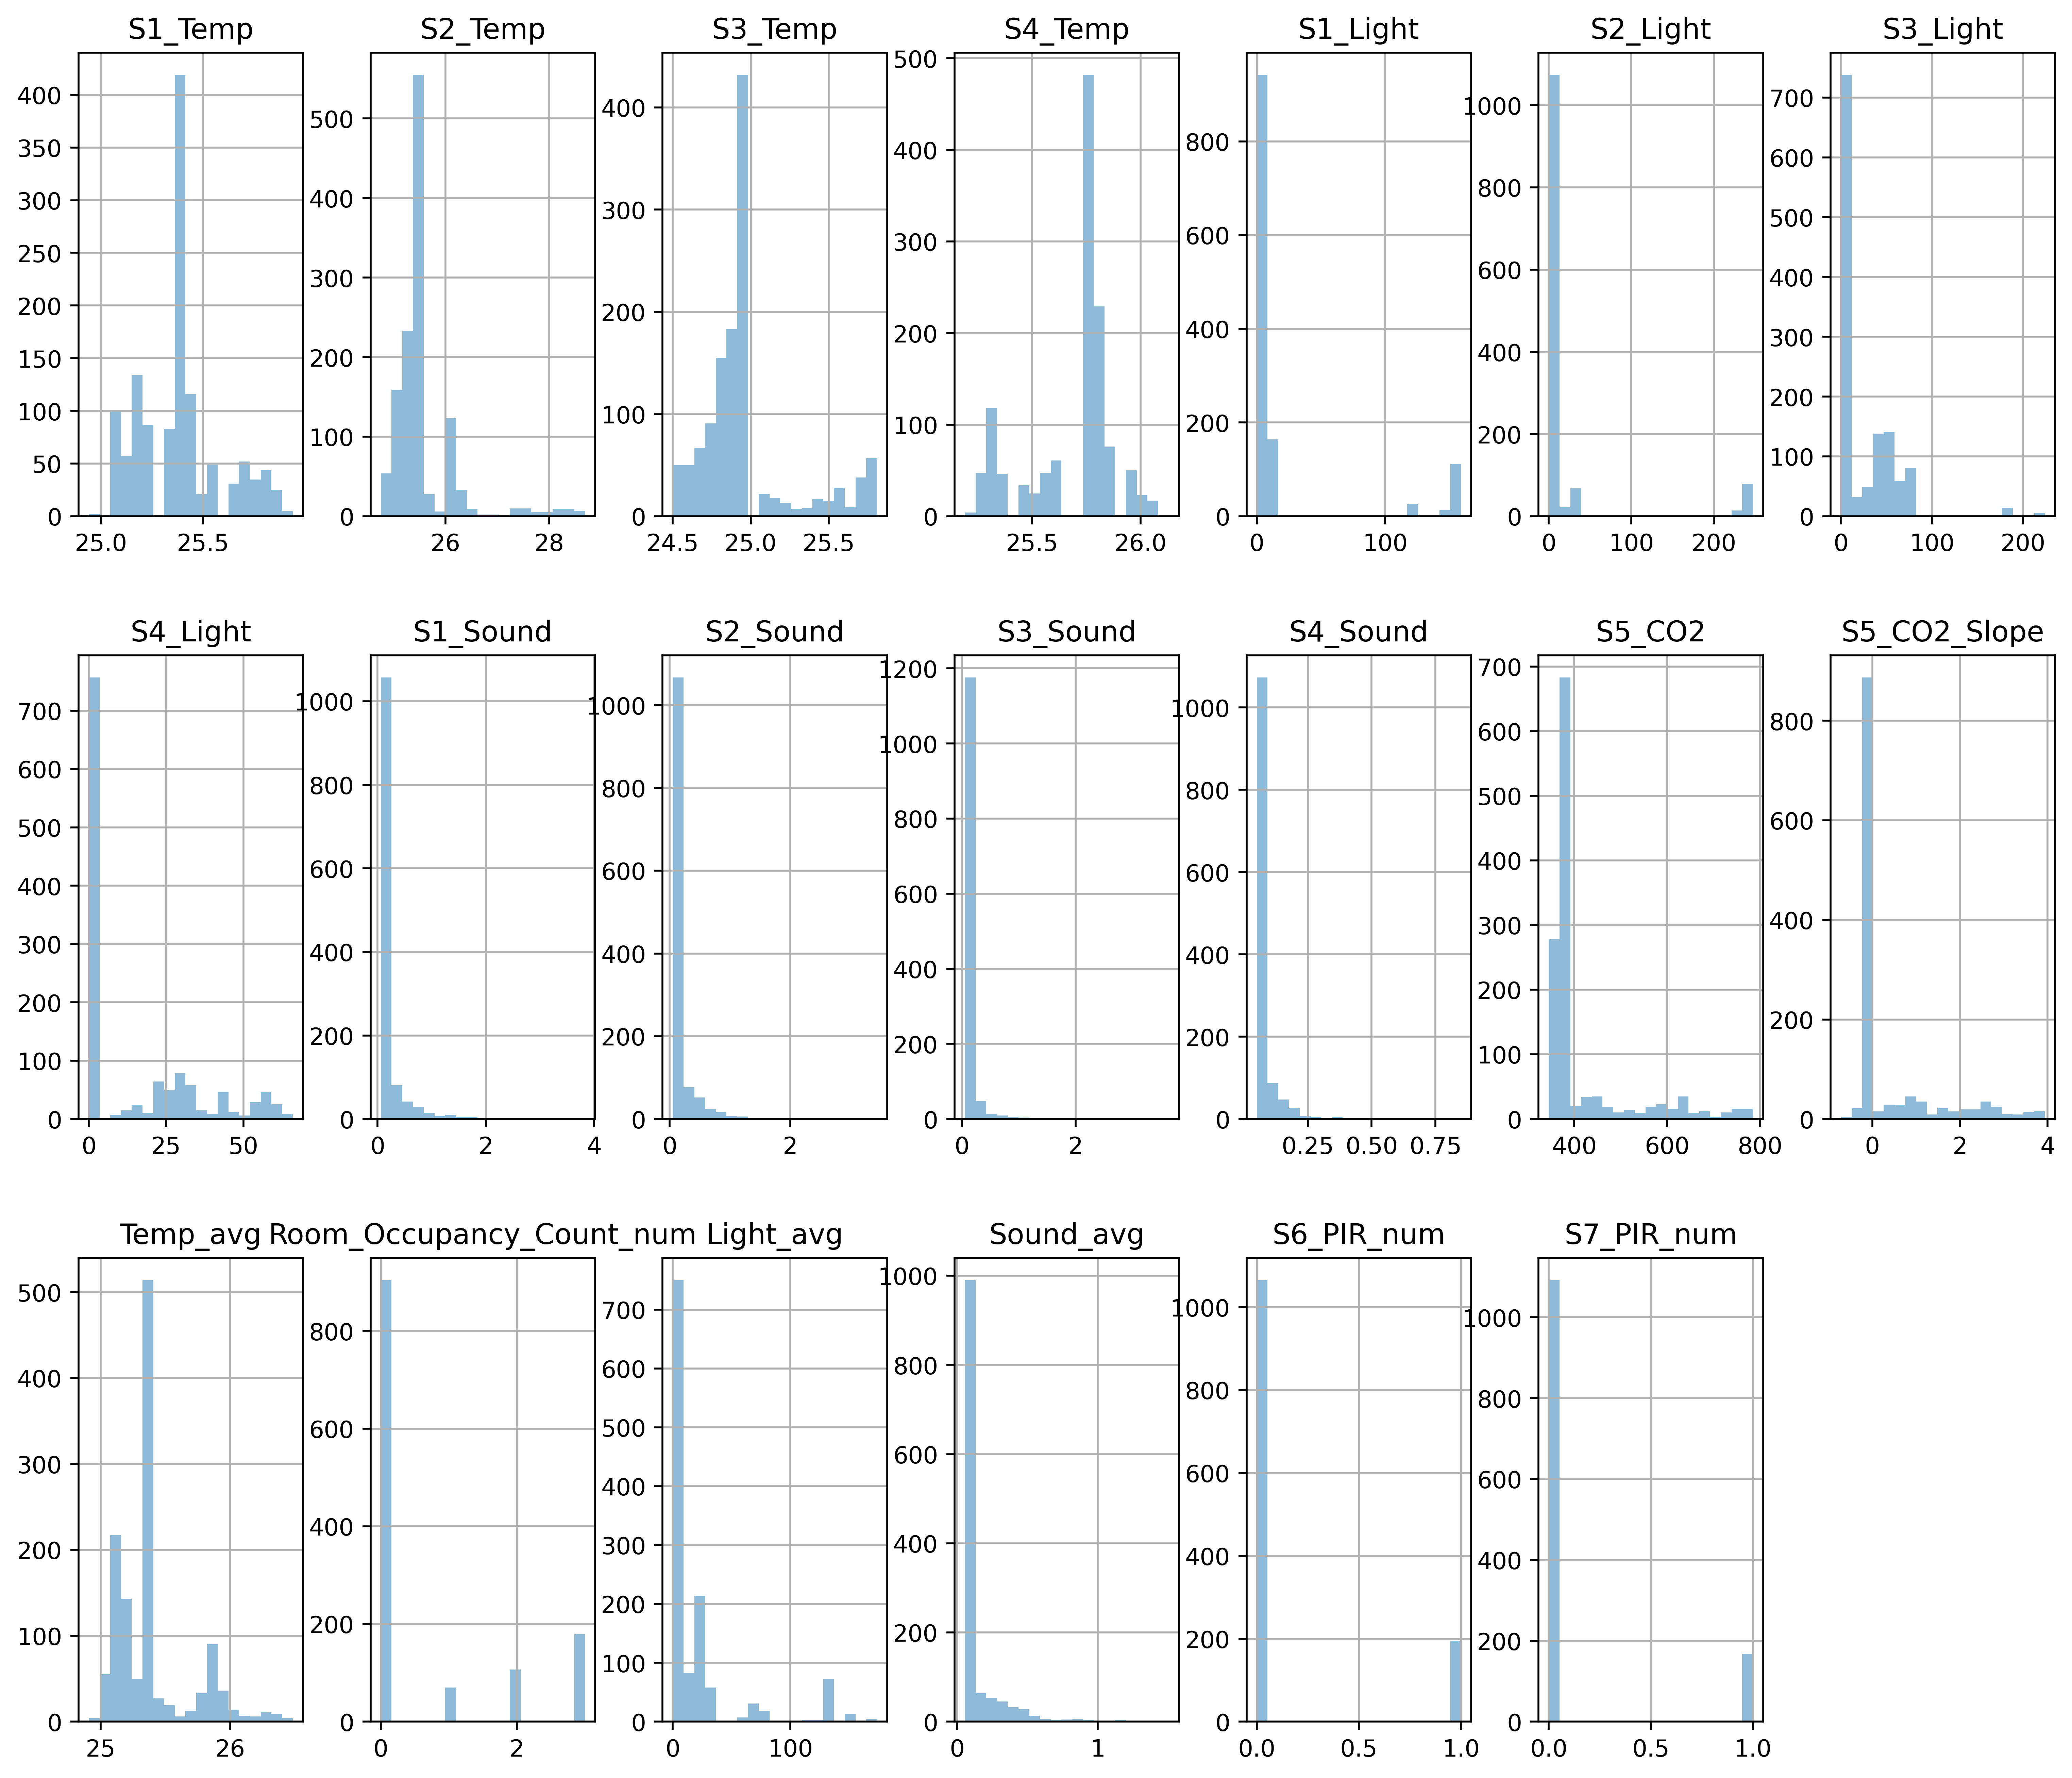

In [ ]:
fig, ax = plt.subplots(figsize=(15,13), dpi=500)
hist = data_mean_imputed.hist(ax=ax, layout=(3,7), bins=19, alpha=0.5)

## Scatterplot for imputation with mean imputation

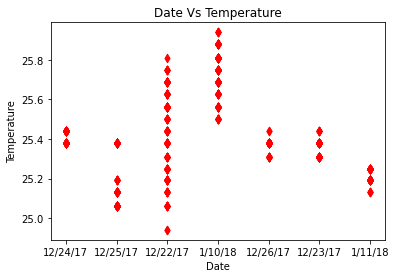

In [ ]:
plt.scatter(data_mean_imputed.Date, data.S1_Temp,color= 'red', marker= "d")
# x-axis label
plt.xlabel('Date')
# frequency label
plt.ylabel('Temperature')
# plot title
plt.title('Date Vs Temperature')
# function to show the plot
plt.show()


## Scatterplot for imputation with mode imputation

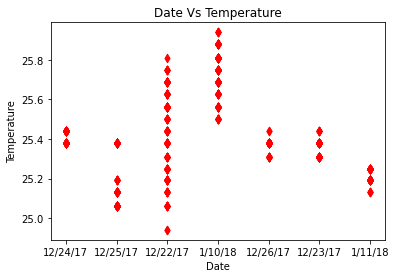

In [ ]:
plt.scatter(data.Date, data.S1_Temp,color= 'red', marker= "d")
# x-axis label
plt.xlabel('Date')
# frequency label
plt.ylabel('Temperature')
# plot title
plt.title('Date Vs Temperature')
# function to show the plot
plt.show()

From above 4 graphs we can conclude our investigation by saying that there has been no changes to the visualization from imputation with mean and imputation with mode.